In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score,
                           recall_score, f1_score, confusion_matrix,
                           roc_curve, precision_recall_curve, classification_report)
import seaborn as sns
import os

os.makedirs('figures', exist_ok=True)
current_dir = os.path.dirname(os.path.abspath('../../__file__')) 

file_path = os.path.join(current_dir, 'S05-hw-dataset.csv')
df = pd.read_csv(file_path)

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,3000.0,1500.500000,866.169729,1.000000,750.750000,1500.500000,2250.250000,3000.000000
age,3000.0,45.059667,14.192883,21.000000,33.000000,45.000000,57.000000,69.000000
income,3000.0,69658.992000,24742.235182,15000.000000,52641.750000,69784.500000,85874.250000,156351.000000
years_employed,3000.0,19.577667,11.381497,0.000000,10.000000,20.000000,29.000000,39.000000
credit_score,3000.0,649.285333,69.955852,402.000000,604.000000,647.000000,697.000000,850.000000
debt_to_income,3000.0,0.284065,0.161112,0.006147,0.157796,0.261726,0.388886,0.878343
num_credit_cards,3000.0,3.494667,2.289917,0.000000,1.000000,3.000000,6.000000,7.000000
num_late_payments,3000.0,6.869333,4.291278,0.000000,3.000000,7.000000,10.000000,14.000000
has_mortgage,3000.0,0.495000,0.500058,0.000000,0.000000,0.000000,1.000000,1.000000
has_car_loan,3000.0,0.501333,0.500082,0.000000,0.000000,1.000000,1.000000,1.000000


In [14]:
df.value_counts(normalize=True)

,,,,,,,,,,,,,,,,,proportion
client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default,
3000,53,75302,13,692,0.093865,2,7,0,0,29853,1259,0.693861,6,2,9,0,0.000333
1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0,0.000333
2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0,0.000333
3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0,0.000333
4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1,0.000333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,57,69664,3,539,0.319360,0,6,0,1,31063,6166,0.581045,4,3,4,1,0.000333
12,68,98126,12,648,0.187963,0,3,0,0,31947,-730,0.819837,7,4,3,0,0.000333
11,46,72737,20,632,0.134631,7,10,0,0,29784,5907,0.222156,4,1,12,0,0.000333


**Итого** в датасете 3000 объектов. Пропусов не обнаружено. Есть смещение в стаже работы: в основном, стаж состовляет 20+ лет, из-за чего мало информации про людей, имеющих маленький стаж работы. Так же есть небольшой перевес в debt_to_income, в сторону более маленьких значений, но это не критично.

Есть небольшие проблемы в стаже работы, остальные отклонения незначительны. Дисбаланс классов (default: 0 = 60%, 1 = 40%) - незначителен.

In [28]:
X = df.drop(columns=['client_id', 'default'])
Y = df['default']
print("Типы признаков:\n",X.dtypes)

Типы признаков:
 age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2, stratify=Y)

dumpy = DummyClassifier(strategy="most_frequent", random_state=42)
dumpy.fit(X_train, Y_train)

Y_pred = dumpy.predict(X_test)
score_acc = accuracy_score(Y_test, Y_pred)

Y_proba = dumpy.predict_proba(X_test)[:, 1]
score_auc = roc_auc_score(Y_test, Y_proba)

print("Accuracy score:", score_acc,"\nROC-AUC score:", score_auc)

Accuracy score: 0.59 
ROC-AUC score: 0.5


Бейзлайн показывает минимальную планку для осмысленных моделей, построенных на данном датасете. Если модель не будет превосходить бейзлайн, то она не имеет смысла и бесполезна для нас.

Бейзлайн показывает, что любая осмысленная модель должна достигать accuracy выше 58% и ROC-AUC выше 0.5, чтобы быть полезной на этих данных.

In [97]:
pipe = Pipeline([
       ("scaler", StandardScaler()),
       ("logreg", LogisticRegression(max_iter=1000))
])
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, Y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшие счет:", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Лучшие параметры: {'logreg__C': 100.0}
Лучшие счет: 0.8606625890118563


In [98]:
best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)
score_acc = accuracy_score(Y_test, Y_pred)

Y_proba = best_model.predict_proba(X_test)[:, 1]
score_auc = roc_auc_score(Y_test, Y_proba)

print("\nТесты лучшей модели\nAccuracy score:", score_acc,"\nROC-AUC score:", score_auc)


Тесты лучшей модели
Accuracy score: 0.8016666666666666 
ROC-AUC score: 0.87564879886087


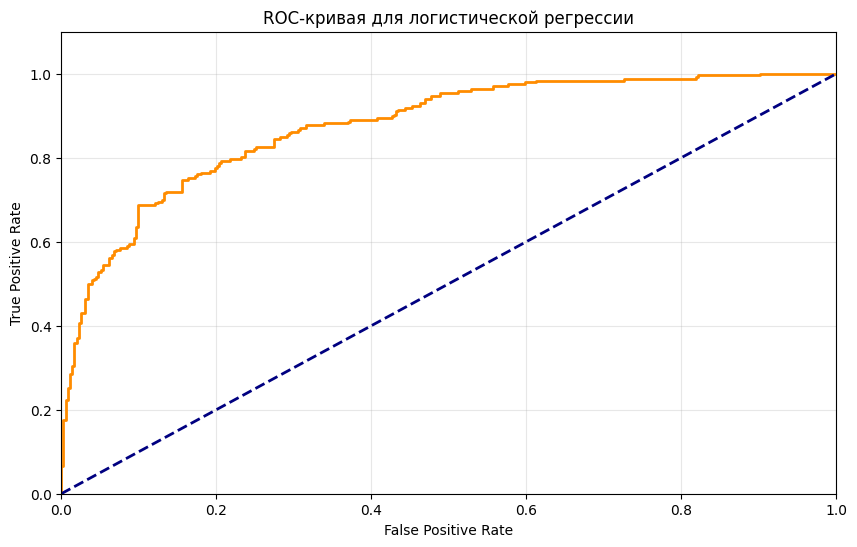

In [99]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.grid(True, alpha=0.3)

plt.savefig('figures/roc_regression.png', dpi=300)

In [102]:
print("Бейзлайн:\n  • Accuracy:  0.579\n  • ROC-AUC:   0.500")
print(f"\nЛогистическая регрессия (лучшая модель):\n  • Accuracy:  {score_acc:.3f}\n  • ROC-AUC:   {score_auc:.3f}")

if hasattr(best_model.named_steps['logreg'], 'coef_'):
    coefficients = best_model.named_steps['logreg'].coef_[0]
    feature_names = X.columns

    sorted_indices = np.argsort(np.abs(coefficients))[::-1]

    print("\n4. ТОП-5 ВАЖНЕЙШИХ ПРИЗНАКОВ (по абсолютным коэффициентам):")
    print("-"*50)
    for i in range(min(5, len(sorted_indices))):
        idx = sorted_indices[i]
        feature = feature_names[idx]
        coef = coefficients[idx]
        print(f"• {feature}: {coef:.4f} ({'положительная' if coef > 0 else 'отрицательная'} связь)")

Бейзлайн:
  • Accuracy:  0.579
  • ROC-AUC:   0.500

Логистическая регрессия (лучшая модель):
  • Accuracy:  0.802
  • ROC-AUC:   0.876

4. ТОП-5 ВАЖНЕЙШИХ ПРИЗНАКОВ (по абсолютным коэффициентам):
--------------------------------------------------
• debt_to_income: 1.1606 (положительная связь)
• num_late_payments: 0.9056 (положительная связь)
• credit_score: -0.7671 (отрицательная связь)
• region_risk_score: 0.7427 (положительная связь)
• active_loans: 0.6508 (положительная связь)


Сравнение бейзлайна и модели:

*   Accuracy score вырос на 0.22 (было 0.58, стало 0.8)
*   ROC-AUC score вырос на 0.37 (было 0.5, стало 0.87)

Параметр регуляризации C существенно влияет на качество модели. Слишком сильная регуляризация (C=0.001) снижает ROC-AUC до ~0.71. При C=100.0 достигаетсяоптимальный баланс между обучением и регуляризацией (ROC-AUC=0.876).

Разумным выбором будет C = 100.0, так как качество предсказания остается высокой и сохраняет интерпретируемость.

Наиболее важные факторы риска дефолта: количество просрочек платежей, кредитный рейтинг, соотношение зарплаты к кредитам. Это соответствует финансовой интуиции и делает модель объяснимой для экспертов.